In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv.imread("Data/Messi.jpg")

In [3]:
img.shape

(409, 615, 3)

In [4]:
img.dtype

dtype('uint8')

In [5]:
type(img)

numpy.ndarray

In [9]:
img.shape[2]

3

In [10]:
# Simple Brightness and Contrast control

new_image = np.zeros(img.shape,img.dtype)

alpha = 5 # Simple Contrast control
beta = 0# Brightness control

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c]=np.clip(alpha*img[y,x,c]+beta,0,255)

# show image
cv.namedWindow('New Image',cv.WINDOW_AUTOSIZE)
cv.imshow('New Image',new_image)
cv.waitKey(0)
cv.destroyAllWindows()

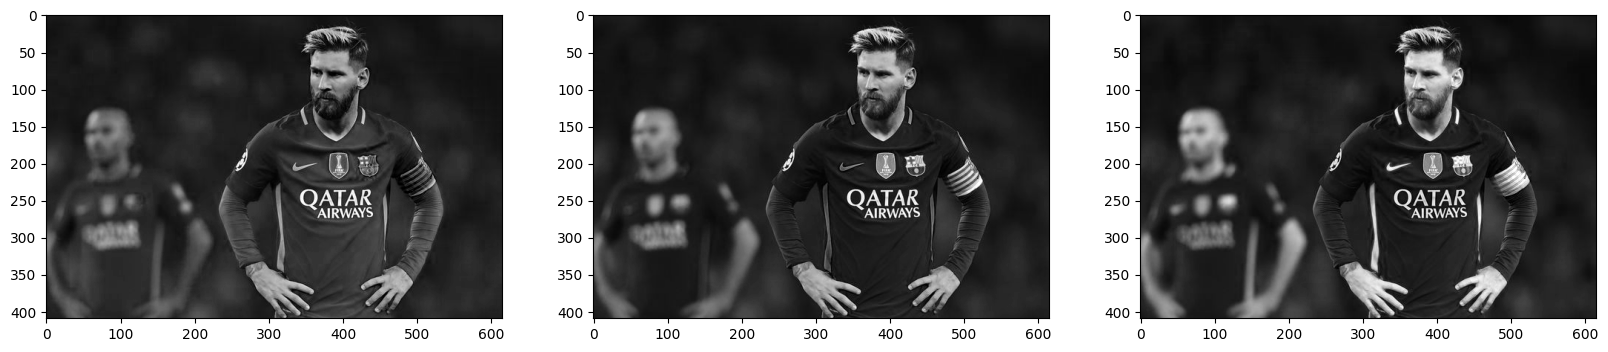

In [15]:
# plot the three channels

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(20,20))
for i in range(0,3):
    ax = axs[i]
    ax.imshow(img[:,:,i],cmap='gray')
plt.show()

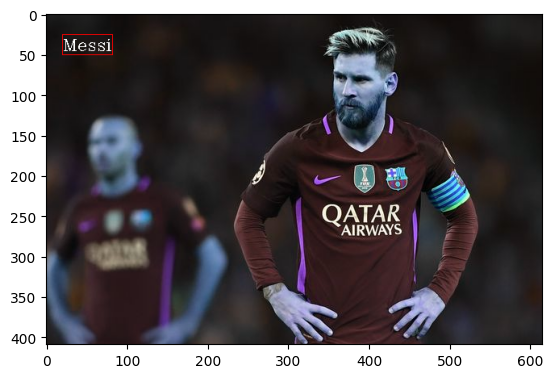

In [16]:
# Shape within the image

# copy the image
img_copy = img.copy()

cv.rectangle(img_copy,pt1=(20,25),pt2=(82,50),color=(255,0,0),thickness=1)
# add text
cv.putText(img_copy,text="Messi",org=(21,45),fontFace=cv.FONT_HERSHEY_COMPLEX,fontScale=0.68,color=(255,255,255),thickness=1)
plt.imshow(img_copy)

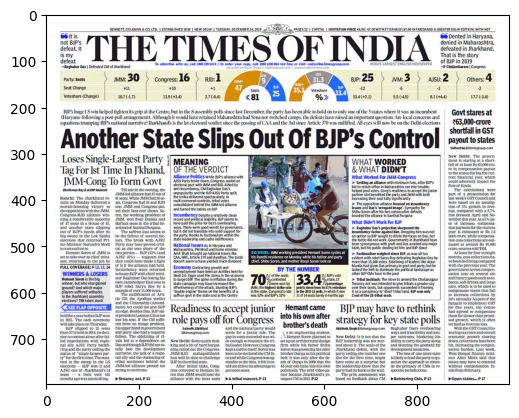

In [2]:
# Blurning and Thresholding

img = cv.imread("Data/newspaper.webp")
plt.imshow(img)

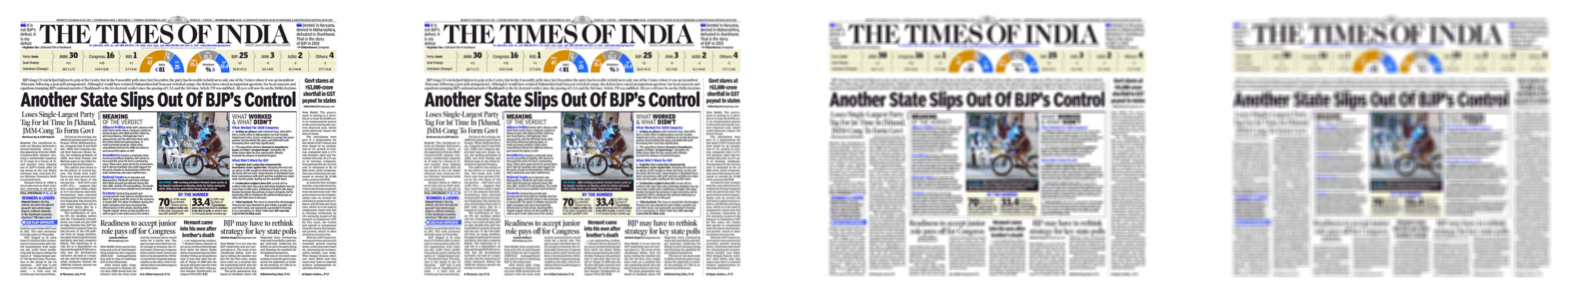

In [18]:
kernals = [3,5,11,17]
fig, axs = plt.subplots(nrows=1,ncols=4,figsize=(20,20))

for ind, s in enumerate(kernals):
    img_blurred = cv.blur(img,ksize=(s,s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')

plt.show()

In [19]:
# https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html

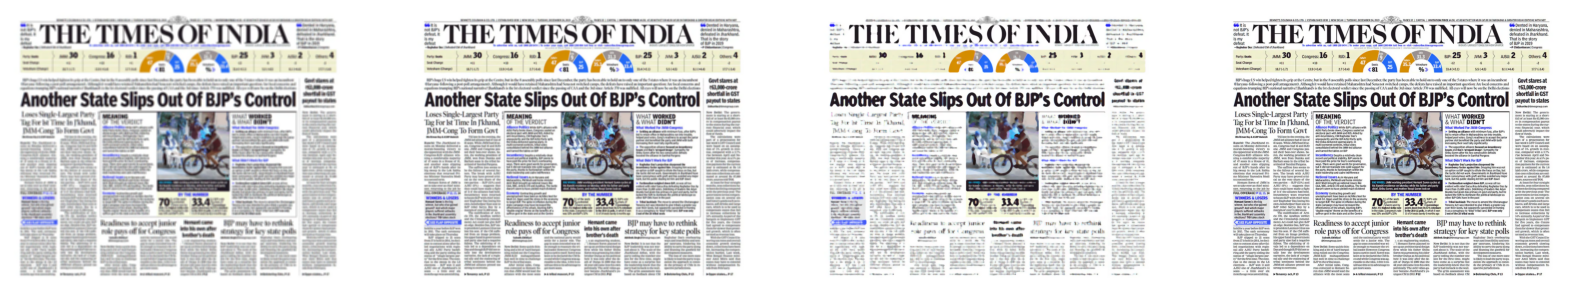

In [20]:
# types of blur

img_0 = cv.blur(img,ksize=(7,7))
img_1 = cv.GaussianBlur(img,ksize=(7,7),sigmaX=0)
img_2 = cv.medianBlur(img,7)
img_3 = cv.bilateralFilter(img,7,sigmaSpace=75,sigmaColor=75)

images=[img_0,img_1,img_2,img_3]
fig, axs = plt.subplots(nrows=1,ncols=4, figsize=(20,20))

for ind, p in enumerate(images):
    ax=axs[ind]
    ax.imshow(p)
    ax.axis('off')
plt.show()

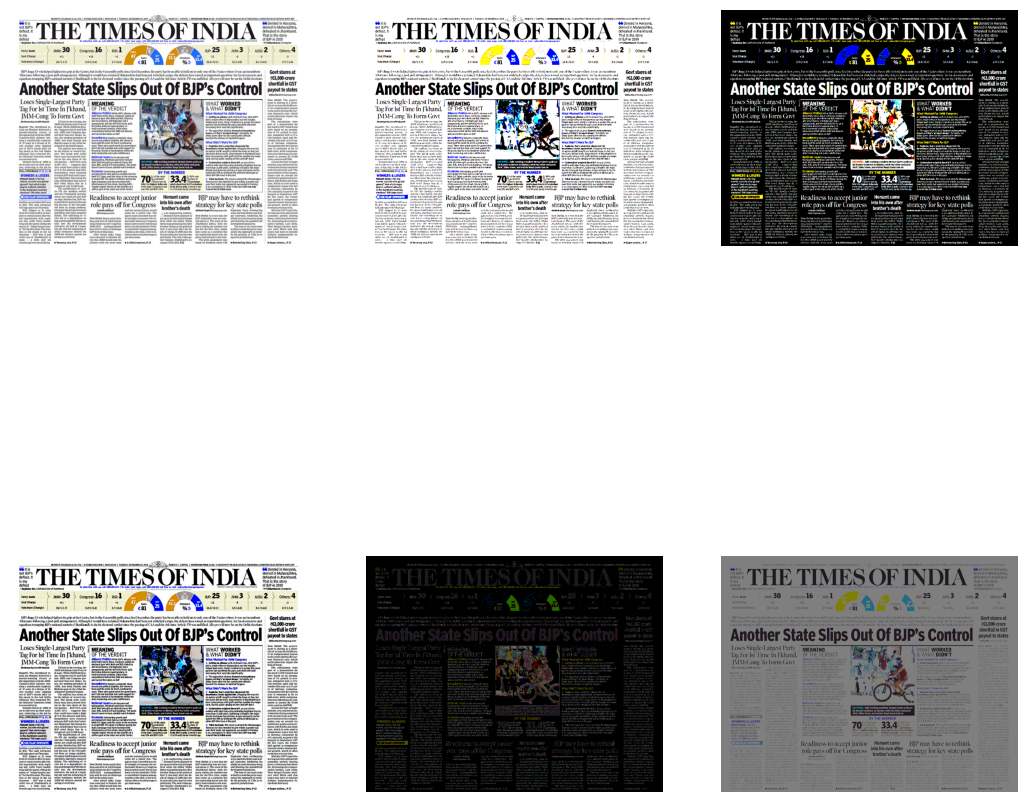

In [3]:
# thresholding

_,thresh_0 = cv.threshold(img,127,255,cv.THRESH_BINARY)          # Increases Brightness of background
_,thresh_1 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)      # Invert image of binary
_,thresh_2 = cv.threshold(img,127,255,cv.THRESH_TOZERO)          # Importance given to zeroes and improves brightnss where zeroes are present
_,thresh_3 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)      # Invert of previous image, and it's a negative image
_,thresh_4 = cv.threshold(img,127,255,cv.THRESH_TRUNC)           # Mostly used threshold, small characters will get dim and large characters will be retained

images=[img,thresh_0,thresh_1,thresh_2,thresh_3,thresh_4]
fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(13,13))

for ind, p in enumerate(images):
    ax=axs[ind//3,ind%3]
    ax.imshow(p)
    ax.axis('off')
plt.show()